##### 샘플 데이터

lg thinq 앱 플레이스토어 리뷰 크롤링

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/한글 크롤링.csv")
df.head()

,Date,Name,Score,Review,like
0,2020년 1월 24일,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0


# ◆ 1. 데이터 전처리하기
* 1.1. 특수문자 및 숫자 제거
* 1.2. 의미없는 짧은 글 제거

### 1.1. 특수문자 및 숫자 제거
    *정규표현식 사용

In [3]:
import re
from tqdm import tqdm

In [5]:
pattern = r'[^a-xA-Z0-9가-힣\s\.\?\!]'
text = "Hi 안녕, hello!?☆"
re.sub(pattern, "", text)

'Hi 안녕 hello!?'

In [7]:
pattern = r'[^a-xA-Z0-9가-힣\s\.\?\!]'
new_review = []
for i in tqdm(df.Review) :
    text = re.sub(pattern, "", i)
    new_review.append(text)
df['Review'] = new_review

100%|██████████| 6280/6280 [00:00<00:00, 358673.02it/s]


### 1.2. 의미없는 짧은 글 제거

In [9]:
for i, review in enumerate(tqdm(df.Review)) : # enumerate : for문에서 index를 같이 보고 싶을 때 (i : rem 값, review : text)
    if len(review) < 15 :
        df = df.drop([i])

100%|██████████| 3454/3454 [00:00<00:00, 1329826.14it/s]


# ◆ 2. 데이터 형태소 분리하기
* 2.1 불용어적용 및 형태소 분리
* 2.2 데이터 프레임에 추가

In [10]:
from konlpy.tag import Okt
okt=Okt()

### 2.1. 불용어적용 및 형태소 분리
    *제공되는 한국어 불용어 파일 사용(ko-stopwords.csv)

In [13]:
stopwords_DF = pd.read_csv("./data/ko-stopwords.csv")
stopwords = list(stopwords_DF['stopwords']) # == stropwords_df.stropwords
stopwords

['가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',


In [14]:
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem = True, norm = True)

    tagged_list = []
    for word, tag in pos_words :
        if tag in ['Noun', 'Adjective', 'Verb'] :
            if word not in stopwords :
                tagged_list.append(word)
    return tagged_list

In [15]:
okt_pos_tagging(df['Review'][0])

['시스템',
 '에어컨',
 '대다',
 '연결하다',
 '격',
 '제어',
 '사용',
 '에어컨',
 '기능',
 '공기청정기',
 '능',
 '앱',
 '모드',
 '청정',
 '모드',
 '없다',
 '냉방',
 '습',
 '송풍',
 '난방',
 '자동',
 '만',
 '청정',
 '없다',
 '리모컨',
 '청정',
 '누르다',
 '앱',
 '송풍',
 '데',
 '앱',
 '송풍',
 '선택',
 '청정',
 '않다',
 '리모컨',
 '송풍',
 '청정',
 '킬수',
 '원격',
 '송풍',
 '청정',
 '에어컨',
 '공기',
 '청정',
 '난방',
 '청정',
 '사용']

### 2.2 데이터 프레임에 추가

In [16]:
tagged_review = []
for review in tqdm(df['Review']) :
    tagged = okt_pos_tagging(review)
    tagged_review.append(tagged)

100%|██████████| 3454/3454 [00:10<00:00, 330.80it/s]


In [21]:
df['tagged_review'] = tagged_review
df

,Date,Name,Score,Review,like,tagged_review
0,2020년 1월 24일,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 에어컨, 기능, 공기청정기..."
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,"[인덕션, 제어, 용, 사용, 끄다, 전용, 건, 좋다, 격, 제어기, 능이, 계속..."
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,"[위례, 살다, 신혼, 부부, 공기청정기, 자다, 연동, 걸리다, 않다, 문제, 김..."
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,"[세탁기, 연결하다, 정도, 세상, 쓰레기, 연결, 번거롭다, 사용성, 까다롭다, ..."
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 추가, 수, 건조, 완료, 후, ..."
...,...,...,...,...,...,...
6230,2018년 3월 1일,이회용,5,디자인 너무 이뻐요. 단순해서 더 좋구요,0,"[디자인, 이쁘다, 단순하다, 더, 좋다]"
6231,2017년 5월 18일,노래여왕,1,어떻게 하라는거예요? 설정하는데 종일 씨름하다 삭제...,0,"[하라, 거, 설정, 종일, 씨름, 삭제]"
6232,2017년 8월 1일,Han-Seung Jeon,1,어플이 더위먹었나? 잘되다가 안되네...,0,"[어플, 더위, 먹다, 안되다]"
6234,2017년 9월 24일,Google 사용자,5,짱!! 밖에 나가도 되니까 진짜 좋아요!,0,"[짱, 나가다, 진짜, 좋다]"


# ◆ 3. 벡터화
* 3.1 doc2vec 준비(문서의 순서 매기기)
* 3.2 doc2vec 학습시키기
* 3.3 벡터 값 데이터 프레임에 추가

In [78]:
#import gensim 안될때 첫번째시도
# pip install --upgrade scipy
# pip install --upgrade gensim

#두번쨰시도
#pip install --upgrade numpy

In [17]:
!pip show scipy

Name: scipy
Version: 1.11.4
Summary: SciPy: Scientific Library for Python
Home-page: https://www.scipy.org
Author: 
Author-email: 
License: BSD
Location: C:\Users\trainee122\anaconda3\Lib\site-packages
Requires: numpy
Required-by: datashader, gensim, imbalanced-learn, scikit-image, scikit-learn, statsmodels


In [18]:
import gensim #자연어 처리 및 토픽 모델링을 위한 라이브러리
from gensim.models.doc2vec import TaggedDocument
from gensim.models import doc2vec

### 3.1 doc2vec 준비

- word2vec은 단어 하나를 하나의 vector화
- doc2vec은 문서 하나를 하나의 vector화

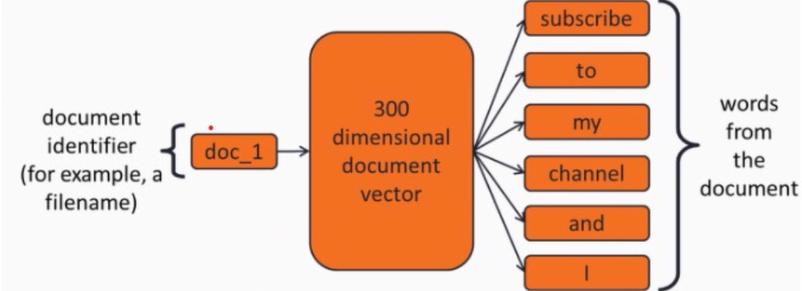

In [22]:
# doc2vector
tagged_corpus_lsit = []
for i, token in enumerate(df.tagged_review) :
    tag = f"document {i}"
    tagged_corpus_lsit.append(TaggedDocument(tags = [tag], words = token))

In [23]:
tagged_corpus_lsit[0]

TaggedDocument(words=['시스템', '에어컨', '대다', '연결하다', '격', '제어', '사용', '에어컨', '기능', '공기청정기', '능', '앱', '모드', '청정', '모드', '없다', '냉방', '습', '송풍', '난방', '자동', '만', '청정', '없다', '리모컨', '청정', '누르다', '앱', '송풍', '데', '앱', '송풍', '선택', '청정', '않다', '리모컨', '송풍', '청정', '킬수', '원격', '송풍', '청정', '에어컨', '공기', '청정', '난방', '청정', '사용'], tags=['document 0'])

### 3.2 doc2vec 학습시키기

    <model 하이퍼파라미터 값>
    # vector_size : 생성할 문서 벡터의 크기
    # alpha: 모델 학습시 초기 학습률 0.025는 일반적으로 사용됨
    # min_alpha: 학습 과정에서 alpha 값을 이 값으로 줄여나가게 됩니다
    # window : 문맥 윈도우 크기, 주변 몇개의 단어의 문맥을 고려하여 학습하는가

In [24]:
model = doc2vec.Doc2Vec(vector_size = 100, alpha = 0.25, min_alpha = 0.025, window = 5)

In [26]:
model.build_vocab(tagged_corpus_lsit)

model.train(tagged_corpus_lsit, total_examples = model.corpus_count, epochs = 5)

### 3.3 벡터 값 데이터 프레임에 추가

In [28]:
model.dv["document 0"] # tagged_corpus_lsit[0] 의 한국어 데이터가 컴퓨터가 인식할 수 있도록 벡터값으로 표현

array([-3.46702516e-01,  3.47256571e-01, -1.81756899e-01, -5.55392057e-02,
        4.33419012e-02, -2.63741076e-01, -7.31315017e-01,  9.01756227e-01,
       -2.09492519e-01,  4.96830195e-02, -8.67448688e-01,  1.13349460e-01,
       -8.02285016e-01,  1.89032376e-01, -1.28656209e-01, -8.40441108e-01,
        5.75540960e-01, -1.60960406e-01, -8.95212531e-01, -1.13029689e-01,
        1.65227950e-01,  2.30646610e-01,  4.07062657e-02, -3.62902611e-01,
       -2.64561325e-01, -6.01801090e-02, -7.43373036e-01, -3.74035448e-01,
       -3.70081738e-02,  3.45278323e-01,  3.44483793e-01, -1.92730725e-01,
       -1.51335686e-01, -6.13425553e-01, -4.69273105e-02, -4.34380732e-02,
        2.83921689e-01,  4.51261029e-02, -8.85637820e-01,  2.24576011e-01,
        1.02361627e-01, -9.23053443e-01,  1.64325133e-01, -1.23834796e-01,
       -7.63081312e-01, -6.74191296e-01,  2.47629121e-01, -2.18989670e-01,
        5.53353369e-01,  4.66095842e-02,  1.21267825e-01, -4.15677637e-01,
       -2.65173733e-01, -

In [29]:
# 벡터값 뽑압서 저장
vector_list = []
for i in range(len(df)) : # 각 인덱스 한번씩 돎
    doc2vec = model.dv[f"document {i}"]
    vector_list.append(doc2vec)

In [30]:
df['vector'] = vector_list
df

,Date,Name,Score,Review,like,tagged_review,vector
0,2020년 1월 24일,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 에어컨, 기능, 공기청정기...","[-0.34670252, 0.34725657, -0.1817569, -0.05553..."
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,"[인덕션, 제어, 용, 사용, 끄다, 전용, 건, 좋다, 격, 제어기, 능이, 계속...","[-0.2936117, 0.10722984, -0.37230322, -0.84482..."
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,"[위례, 살다, 신혼, 부부, 공기청정기, 자다, 연동, 걸리다, 않다, 문제, 김...","[-0.026138704, 0.4423121, -0.4001457, 0.004646..."
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,"[세탁기, 연결하다, 정도, 세상, 쓰레기, 연결, 번거롭다, 사용성, 까다롭다, ...","[-0.23055202, -0.0485264, -0.19324352, -0.1418..."
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 추가, 수, 건조, 완료, 후, ...","[-0.1028823, 0.37095952, -0.093728304, -0.4726..."
...,...,...,...,...,...,...,...
6230,2018년 3월 1일,이회용,5,디자인 너무 이뻐요. 단순해서 더 좋구요,0,"[디자인, 이쁘다, 단순하다, 더, 좋다]","[-0.028693974, 0.046082363, -0.13357487, -0.09..."
6231,2017년 5월 18일,노래여왕,1,어떻게 하라는거예요? 설정하는데 종일 씨름하다 삭제...,0,"[하라, 거, 설정, 종일, 씨름, 삭제]","[-0.03212792, -0.05440468, -0.0071399994, -0.0..."
6232,2017년 8월 1일,Han-Seung Jeon,1,어플이 더위먹었나? 잘되다가 안되네...,0,"[어플, 더위, 먹다, 안되다]","[-0.17432788, -0.27621365, -0.055785436, -0.03..."
6234,2017년 9월 24일,Google 사용자,5,짱!! 밖에 나가도 되니까 진짜 좋아요!,0,"[짱, 나가다, 진짜, 좋다]","[-0.075247996, -0.11577755, -0.32401234, -0.13..."


# ◆ 4. 병합 계층적 클러스터링
* 4.1 ward 기준으로 덴드로그램 그려보기
* 4.2 실루엣 지수 확인해서 토픽 갯수 정하기
* 4.3 가장 적절한 클러스터링 갯수 df에 삽입

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

### 4.1 ward 기준으로 덴드로그램 그려보기

In [32]:
linked = linkage(list(df['vector']), "ward")

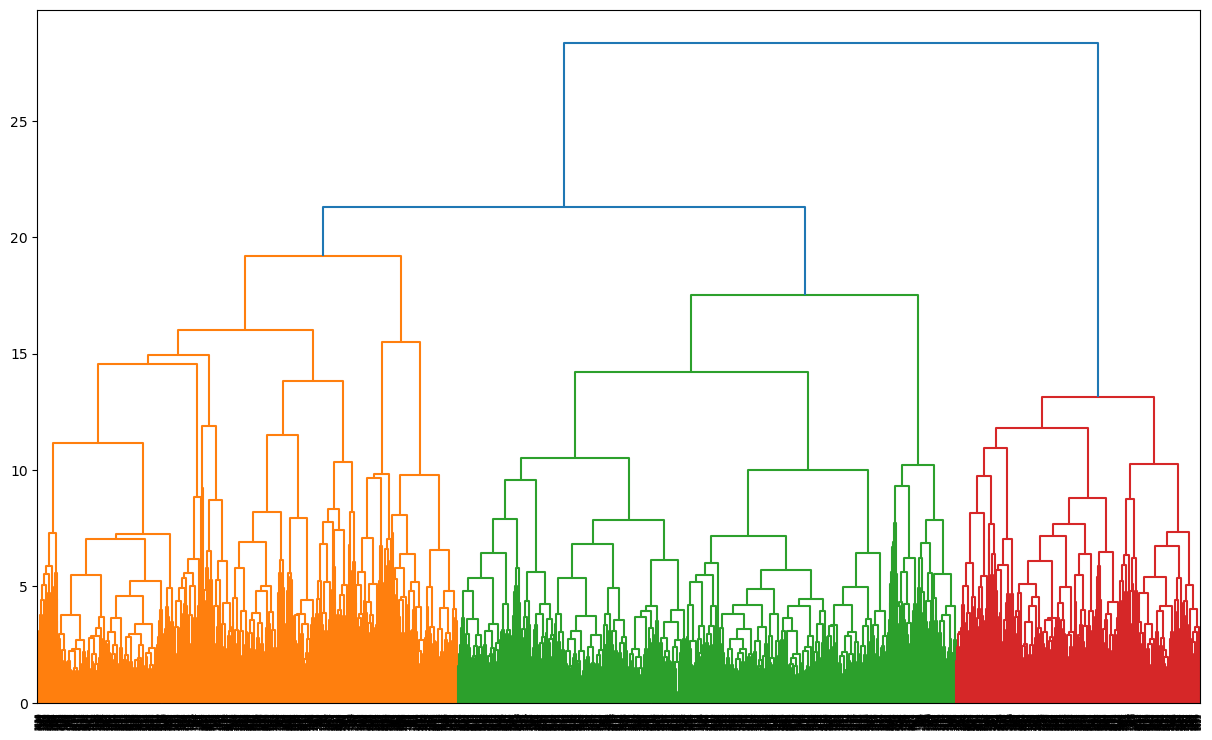

In [35]:
plt.figure(figsize=(15,9))
dendrogram(linked,
          orientation = 'top', #방향 위쪽으로그려짐
          distance_sort = 'descending', #내림차순 정렬
           show_leaf_counts=True )
plt.savefig('sample_plot.png')
 
plt.show()

### 4.2 실루엣 지수 확인해서 토픽 갯수 정하기

In [36]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [37]:
cluster = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
cluster_label = cluster.fit_predict(list(df['vector']))

In [38]:
score = silhouette_score(list(df['vector']), cluster_label)
score

0.0790093

In [41]:
n_cluster = []
s_score = []

for i in tqdm(range(2, 30)) :
    cluster = AgglomerativeClustering(n_clusters = i, linkage = "ward")
    cluster_label = cluster.fit_predict(list(df['vector']))
    score = silhouette_score(list(df['vector']), cluster_label)

    n_cluster.append(i)
    s_score.append(score)

100%|██████████| 28/28 [00:14<00:00,  1.87it/s]


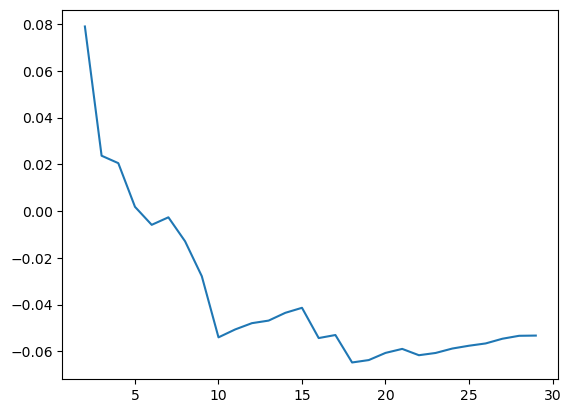

In [43]:
plt.plot(n_cluster, s_score)

In [46]:
result = pd.DataFrame({'n_cluster' : n_cluster,'score' : s_score})
result

,n_cluster,score
0,2,0.079009
1,3,0.023715
2,4,0.020534
3,5,0.001846
4,6,-0.005854
5,7,-0.002638
6,8,-0.012913
7,9,-0.027835
8,10,-0.053995
9,11,-0.050606


### 4.3 가장 적절한 클러스터링 갯수 df에 삽입

In [47]:
cluster = AgglomerativeClustering(n_clusters = 6, linkage = 'ward')
cluster_label = cluster.fit_predict(list(df['vector']))

df['cluster'] = cluster_label
df.head()

,Date,Name,Score,Review,like,tagged_review,vector,cluster
0,2020년 1월 24일,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 에어컨, 기능, 공기청정기...","[-0.34670252, 0.34725657, -0.1817569, -0.05553...",3
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,"[인덕션, 제어, 용, 사용, 끄다, 전용, 건, 좋다, 격, 제어기, 능이, 계속...","[-0.2936117, 0.10722984, -0.37230322, -0.84482...",4
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,"[위례, 살다, 신혼, 부부, 공기청정기, 자다, 연동, 걸리다, 않다, 문제, 김...","[-0.026138704, 0.4423121, -0.4001457, 0.004646...",1
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,"[세탁기, 연결하다, 정도, 세상, 쓰레기, 연결, 번거롭다, 사용성, 까다롭다, ...","[-0.23055202, -0.0485264, -0.19324352, -0.1418...",2
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 추가, 수, 건조, 완료, 후, ...","[-0.1028823, 0.37095952, -0.093728304, -0.4726...",5


In [48]:
df['cluster'].value_counts()

cluster
2    1277
3     724
1     578
5     366
0     306
4     203
Name: count, dtype: int64

In [50]:
import pickle

In [51]:
with open('클러스터링 결과.pkl', 'wb') as file :
    pickle.dump(df,file)

# ◆ 5. 해석하기:TF-IDF
* 문서 내에서 어떤 단어가 얼마나 중요한지를 평가하는 데 사용되는 방법
* 5.1 TF-IDF 계산
* 5.2 데이터프레임으로 만들고 정렬하기

### 5.1 TF-idf 계산
* 각 클러스터 마다 tfidf가 높은 워드들 찾기
* 각 클러스터들을 하나의 문서로 가정하여 tf-idf 값 추출

In [52]:
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
all_document = [] # 6개의 document 들어감
for i in df['cluster'].unique() : # 5개일지 6개일지 몰라 하지만 몇개이든 코드 바꿈없이 실행하기 위해 unique()를 사용
    pos_tagged = df[df['cluster'] == i].tagged_review
    cluster_document = ''
    for pos in pos_tagged :
        doc = ' '.join(pos)
        cluster_document += doc

    all_document.append(cluster_document)

In [57]:
len(all_document)
all_document[0]

'시스템 에어컨 대다 연결하다 격 제어 사용 에어컨 기능 공기청정기 능 앱 모드 청정 모드 없다 냉방 습 송풍 난방 자동 만 청정 없다 리모컨 청정 누르다 앱 송풍 데 앱 송풍 선택 청정 않다 리모컨 송풍 청정 킬수 원격 송풍 청정 에어컨 공기 청정 난방 청정 사용업데이트 이후 공기청정기 휴대폰 켜다 끄다 무조건 휴대폰 끄다 꺼지다 청 꺼지다 않다 띵띵띵 울리다 표기 업데이트 이전 폰 켜다 청 끄다 문제 없다스타 이르다 사용 와이파이 등록 격 제어 사용 갑자기 와이파이 연결 않다 앱 기기 삭제 재 등록 버튼 깜빡 거리 데 앱 단계 넘어가다 않다 바지 관리 기능 사용 못 와이파이 확인 핸드폰 재부팅 앱 재 설치 다해 보다 안되다 앱 문제 스타 이르다 인지 실망연결 안되다 제품 네트워크 변경 안되다 앱 업데이트 만들다 네트워크 변경 단계 넘어가다 바꾸다 말다 가이드 나오다 넘어가다 아예 없다 뭘 합앱 동시 기다리다 메시지 가까이 나오다 기네 리모컨 기능 빼 버리다 때문 라면 간단 모드 고급 모드 나누다 선택 해도 좋다갑자기 로그인 더니 등록 가구 삭제 와이파이 연결 안되다 아니다 잘만 사용 로그인 등록 돼다 제품 삭제 돼다 다시 설정 뜨다 않다 뭡독서실 시스템 에어컨 사용 업데이트 뜨다 등록 기기 사라지다 기존 업데이트 후 기기 연결 해제 일로 고객 센터 연락 일도 이제 지겹다 그냥 원격 적외선 리모컨 쓰다 좋다사다 와이프 사용 다시 등록 하나요 삼성 구성원 등록 하니 등록 제품 그대로 옮기다 엘지 그렇다 기능 없다 가요잘쓰다 날 메인 화면 등록 제품 없다 뜨다 다시 제품 연결하다 등록 등록 되어다 그렇다 뭐 가문 젠 가요유용하다 자다 쓰다 안드로이드 업데이트 이후 모바일 데이타 로봇청소기 연결 해제 되어다 나오다 폰 오류 건지다 모르다업데이트 등록 제품 싹 사라지다 업데이트 초기 업데이트 목적 입 등록 귀찮다 엘지 기술 실망 엉망공기청정기 사용 중 예전 연결 업데이트 제품 스마트폰 연결하다 말 나오다 연결 안되다 빠르다 문제해결 부탁드리다작동 로봇청소기 연결 청

In [59]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_document)

In [62]:
feature = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()

tf_idf_df = pd.DataFrame(dense, columns = feature)
tf_idf_df.head()

,가게,가격,가구,가기,가까워지다,가까이,가깝다,가끔,가나,가나드럼세탁기,...,희망,흰색,히스토리,히키,힘내다멋대로,힘드다,힘드다김치냉장고,힘들다,힘들다그닥,힘쓰다
0,0.000000,0.004750,0.002318,0.000000,0.000000,0.004636,0.004814,0.003563,0.001375,0.002318,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002750,0.000000,0.006876,0.000000,0.000000
1,0.017726,0.004541,0.000000,0.006136,0.008863,0.000000,0.000000,0.004541,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014727,0.005685,0.000000,...,0.007857,0.000000,0.004791,0.000000,0.000000,0.002842,0.004791,0.011369,0.000000,0.004791
3,0.000000,0.001917,0.000000,0.002590,0.000000,0.000000,0.005181,0.017253,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.003742,0.003742,0.006659,0.000000,0.004440,0.000000,0.000000
4,0.000000,0.003302,0.000000,0.000000,0.000000,0.000000,0.000000,0.003302,0.003823,0.000000,...,0.000000,0.006445,0.000000,0.000000,0.000000,0.007647,0.000000,0.000000,0.006445,0.000000


In [63]:
tf_idf_df_transposed = tf_idf_df.T
tf_idf_df_transposed

,0,1,2,3,4,5
가게,0.000000,0.017726,0.000000,0.000000,0.000000,0.000000
가격,0.004750,0.004541,0.000000,0.001917,0.003302,0.002855
가구,0.002318,0.000000,0.000000,0.000000,0.000000,0.000000
가기,0.000000,0.006136,0.000000,0.002590,0.000000,0.007716
가까워지다,0.000000,0.008863,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
힘드다,0.002750,0.000000,0.002842,0.006659,0.007647,0.000000
힘드다김치냉장고,0.000000,0.000000,0.004791,0.000000,0.000000,0.000000
힘들다,0.006876,0.000000,0.011369,0.004440,0.000000,0.009918
힘들다그닥,0.000000,0.000000,0.000000,0.000000,0.006445,0.000000


In [65]:
for i in tqdm(tf_idf_df_transposed.columns) :
    tf_idf_data = tf_idf_df_transposed[i].sort_values(ascending = False)
    data = {'word' : tf_idf_data.index, 'tf-idf' : tf_idf_data.values}
    data_df = pd.DataFrame(data)

    data_df.to_csv(f'cluster{i}_tf-idf.csv', encoding = 'utf-8-sig')

100%|██████████| 6/6 [00:00<00:00, 63.26it/s]


### 5.2 데이터프레임으로 만들고 정렬하기